# FASHION CLASS CLASSIFICATION USING CNNs

## STEP 1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 




## STEP 2: IMPORTING DATA

In [20]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
%matplotlib inline


In [21]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

## STEP 3: VISUALIZATION OF THE DATASET  

In [22]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [26]:
fashion_train_df.shape

(60000, 785)

In [27]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [28]:
training.shape

(60000, 785)

In [29]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

1.0

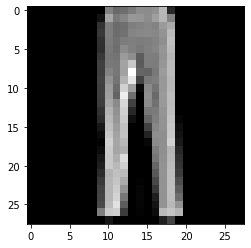

In [33]:
# Let's view some images!
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label = training[i,0]
label

# the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


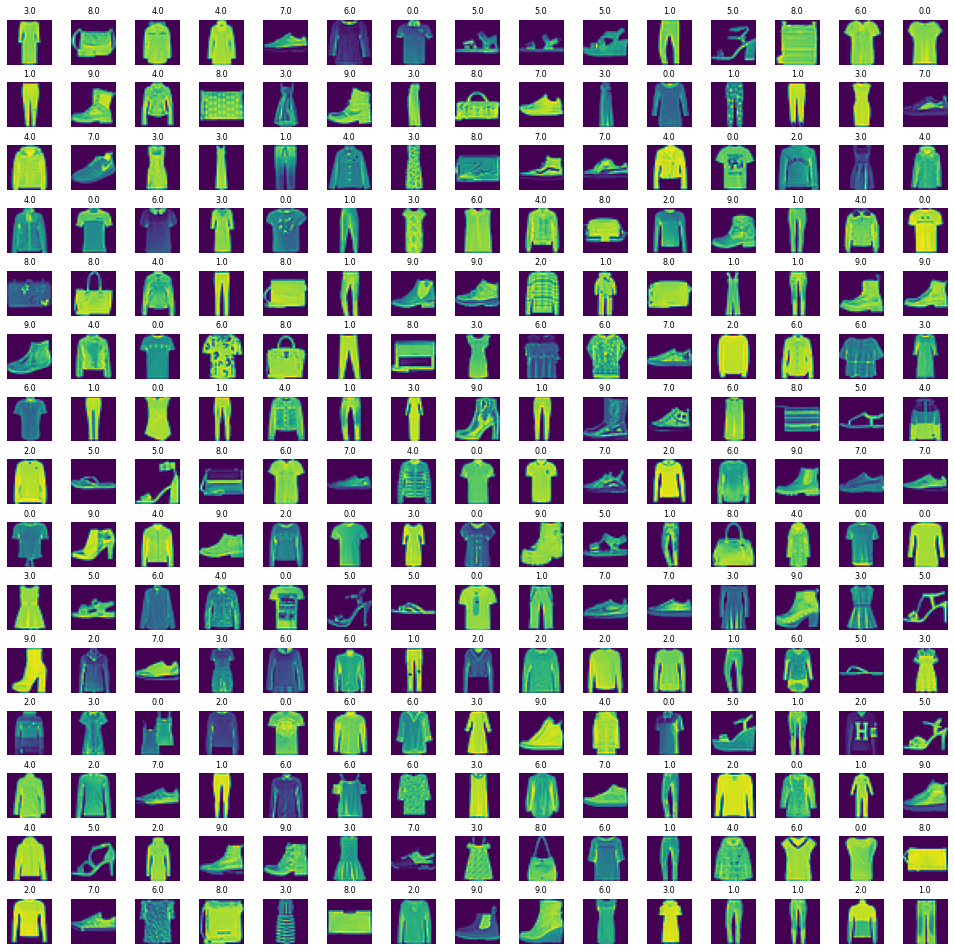

In [32]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

## STEP 4: TRAINING THE MODEL

In [34]:
# preparing training and testing dataset

X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [36]:
X_train.shape

(48000, 784)

In [37]:
X_validate.shape

(12000, 784)

In [38]:
# reshaping from array format to pixel arrangement format to be fed to neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [39]:
X_train.shape

(48000, 28, 28, 1)

In [40]:
X_test.shape

(10000, 28, 28, 1)

In [41]:
X_validate.shape

(12000, 28, 28, 1)

In [43]:
# building the cnn
import tensorflow as tf
# initializing the cnn
cnn = tf.keras.models.Sequential()

In [44]:
# adding the convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

In [45]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [46]:
#flattening
cnn.add(tf.keras.layers.Flatten())

In [48]:
#full connection
cnn.add(tf.keras.layers.Dense(units = 32, activation='relu'))

In [49]:
#output layer
cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [50]:
#compiling the cnn
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [52]:
#training the cnn


history = cnn.fit(X_train,
                  y_train,
                  batch_size = 512,
                  epochs = 50,
                  verbose = 1,
                  validation_data = (X_validate, y_validate))



Epoch 1/50
94/94 [==============================] - 21s 224ms/step - loss: 0.7981 - accuracy: 0.7179 - val_loss: 0.5038 - val_accuracy: 0.8127
Epoch 2/50
94/94 [==============================] - 21s 221ms/step - loss: 0.4496 - accuracy: 0.8417 - val_loss: 0.4053 - val_accuracy: 0.8613
Epoch 3/50
94/94 [==============================] - 21s 222ms/step - loss: 0.3971 - accuracy: 0.8612 - val_loss: 0.4025 - val_accuracy: 0.8617
Epoch 4/50
94/94 [==============================] - 20s 218ms/step - loss: 0.3651 - accuracy: 0.8729 - val_loss: 0.3518 - val_accuracy: 0.8791
Epoch 5/50
94/94 [==============================] - 20s 217ms/step - loss: 0.3457 - accuracy: 0.8794 - val_loss: 0.3447 - val_accuracy: 0.8808
Epoch 6/50
94/94 [==============================] - 21s 219ms/step - loss: 0.3223 - accuracy: 0.8882 - val_loss: 0.3284 - val_accuracy: 0.8858
Epoch 7/50
94/94 [==============================] - 20s 215ms/step - loss: 0.3132 - accuracy: 0.8904 - val_loss: 0.3199 - val_accuracy: 0.8903

## STEP 5: EVALUATING THE MODEL 

In [53]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2592 - accuracy: 0.9174
Test Accuracy : 0.917


In [59]:
# get the predictions for the test data
y_pred = cnn.predict(X_test)


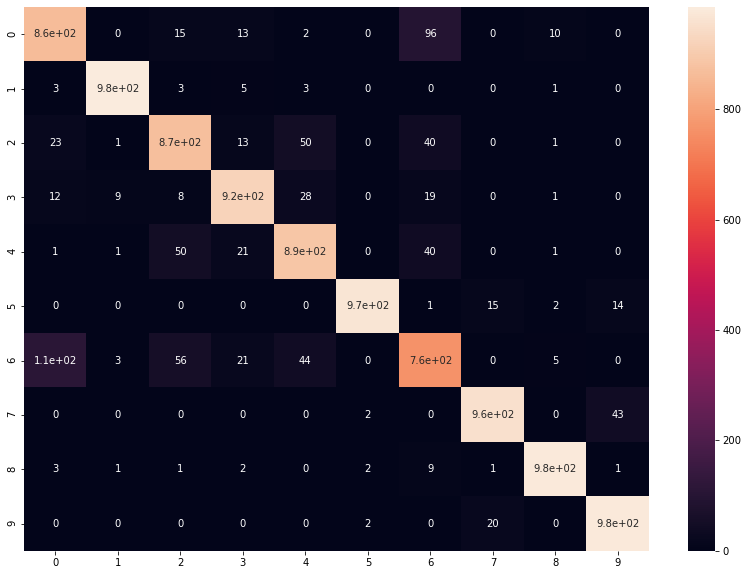

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis = 1))
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [63]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, np.argmax(y_pred, axis = 1), target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.79      0.76      0.78      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.94      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

